# Tugas 06 - Praprocessing Data Tak Terstruktur Part 2

Nama : Muh.Ikhsan

NIM  : H071191049

## 1. Lanjutan Data Citra 

Citra adalah larik angka multidimensi mulai dari 0 hingga 255. Setiap angka dapat dilihat sebagai kombinasi koordinat x(horizontal) dan y(vertikal), yang disebut piksel.

Tiga jenis citra yang berbeda 
- Citra biner - dengan nilai piksel 0(gelap) atau 255(terang).
- Citra grayscale - dengan nilai piksel dari rentang 0 hingga 255.
- Citra berwarna - Misal, Citra yang terdiri dari 3 saluran merah(R), hijau(G) dan biru(B). Untuk setiap saluran, nilai piksel berkisar antara 0 hingga 255.

### Denoising


Image Denoising adalah teknik menghilangkan noise atau distorsi dari sebuah citra. Contoh pengaplikasian denoising seperti citra buram dapat dibuat jelas.

#### Definisi noise
Noise adalah variasi acak dari kecerahan atau informasi warna dalam citra dan produk sampingan yang tidak diinginkan dari citra yang mengaburkan informasi yang diinginkan.

#### Jenis-Jenis Noise
- Gaussian Noise, ini adalah noise statistik yang memiliki fungsi kerapatan probailitas (PDF) yang sama dengan distribusi normal.
- Salt and Pepper Noise, juga dikenal sebagai impuls noise. Noise ini dapat disebabkan oleh gangguan yang tajam dan mendadak pada sinyal gambar. Noise ini tampak sebagai piksel putih dan hitam yang jarang terjadi. 
- Speckle Noise, Jenis noise ini dapat dilihat pada citra medis karena sinyal dari hamburan dasar.
- Poisson Noise, juga dikenal sebagai short noise, noise ini dimodelkan dengan proses Poisson


Untuk membuat noise disini saya akan menggunakan skimage, 

param
- Gaussian noise : "gaussian"
- Salt and Pepper : "s&p"
- Poisson : "poisson"
- Speckle : "speckle"

In [269]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [270]:
im = cv.imread("/content/drive/MyDrive/image_assets/lenna.png")
im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

In [271]:
import skimage

im_gauss = skimage.util.random_noise(im_rgb, mode="gaussian")
im_sp = skimage.util.random_noise(im_rgb, mode="s&p")
im_poisson = skimage.util.random_noise(im_rgb, mode="poisson")
im_speckle = skimage.util.random_noise(im_rgb, mode="speckle")

Text(0.5, 1.0, 'Speckle Noise')

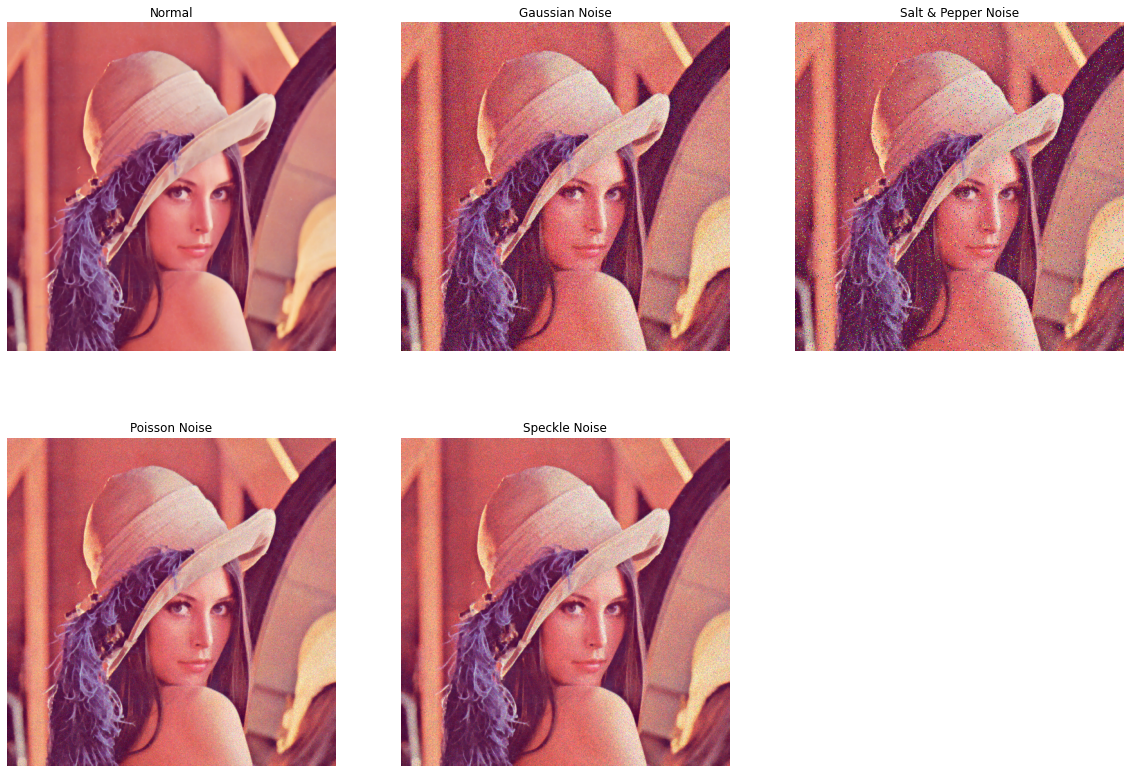

In [272]:
fig = plt.figure(figsize=(20, 14))
r = 2
c = 3

fig.add_subplot(r, c, 1)
plt.imshow(im_rgb)
plt.axis('off')
plt.title("Normal")

fig.add_subplot(r, c, 2)
plt.imshow(im_gauss)
plt.axis('off')
plt.title("Gaussian Noise")

fig.add_subplot(r, c, 3)
plt.imshow(im_sp)
plt.axis('off')
plt.title("Salt & Pepper Noise")

fig.add_subplot(r, c, 4)
plt.imshow(im_poisson)
plt.axis('off')
plt.title("Poisson Noise")

fig.add_subplot(r, c, 5)
plt.imshow(im_speckle)
plt.axis('off')
plt.title("Speckle Noise")

#### Definisi Denoising
Denoising adalah proses untuk menyimpan detail gambar sambil menghilangkan noise acak dari gambar sebanyak mungkin.

Filter Denoising dapat dikategorikan ke 2 kategori dasar :
- Filter Tradisional - Filter yang secara tradisional digunakan untuk menghilangkan noise dari gambar. Filter ini dibagi lagi menjadi filter domain Spasial dan filter domain Transform.
- Filter berbasis Fuzzy - Filter yang menyertakan konsep logika fuzzy dalam prosedur penyaringannya.

Teknik Denoising Gambar 
- Spatial Filtering
  - Filter Linear - Efektif untuk Gaussian dan Salt and Pepper Noise.
    - Mean Filter - Sliding-Window filter sederhana yang menggantikan nilai piksel tengah di kernel window dengan rata-rata (rata-rata) dari semua nilai piksel di jendela kernel itu.
    - Filter Weiner - Pendekatan statistik untuk menghilangkan noise dari sinyal, dengan tujuan agar perbedaan antara sinyal asli dan sinyal baru seminimal mungkin.
  - Filter Non Linear - Dengan filter non-linear, noise dihilangkan tanpa
ada upaya untuk mengidentifikasinya secara eksplisit.
    - Filter Median - menggantikan nilai piksel tengah di kernel window dengan median dari semua nilai piksel di jendela kernel itu.
    - Weighted Median Filter - Satu-satunya perbedaan antara filter Median dan Weighted Median Filter adalah keberadaan Mask. Mask ini akan memiliki beberapa bobot (atau nilai) dan dirata-ratakan.
- Transform Domain Filtering

Berikut contoh denoising gaussian blur menggunakan mean filter open cv

Text(0.5, 1.0, 'Result Denoising using Mean Filter')

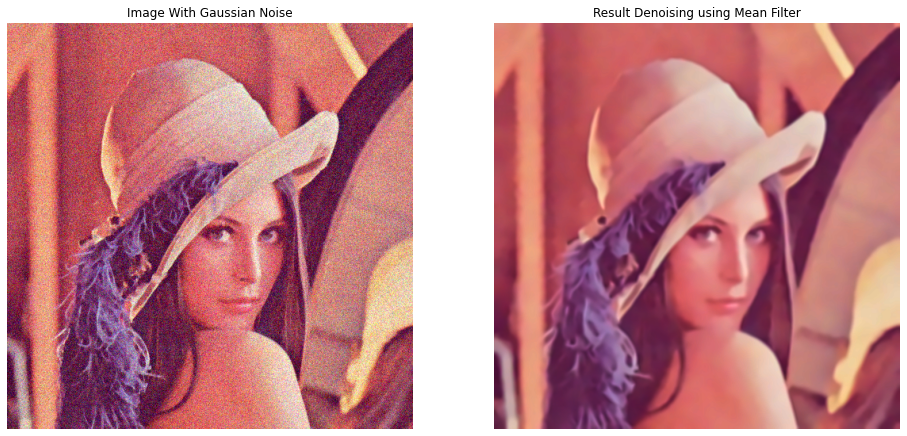

In [273]:
from skimage import img_as_ubyte
noisy = img_as_ubyte(im_gauss)
im_gb = cv.GaussianBlur(noisy, (7,7), 0)
im_denoise_mf = cv.fastNlMeansDenoisingColored(im_gb, None, 10, 10, 7, 15)

fig = plt.figure(figsize=(16, 14))
r = 1
c = 2

fig.add_subplot(r, c, 1)
plt.imshow(noisy)
plt.axis('off')
plt.title("Image With Gaussian Noise")

fig.add_subplot(r, c, 2)
plt.imshow(im_denoise_mf)
plt.axis('off')
plt.title("Result Denoising using Mean Filter")


### Thresholding

Tresholding adalah cara untuk membuat citra biner dari citra skala abu-abu atau penuh warna. Ini biasanya dilakukan untuk memisahkan "objek" atau piksel latar depan dari piksel latar belakang untuk membantu pemrosesan citra.

Metode thresholding yang paling sederhana mengganti setiap piksel dalam suatu citra dengan piksel hitam jika intensitas citra kurang dari suatu konstanta atau piksel putih jika intensitas gambar lebih besar dari konstanta tersebut.

**Simple Thresshold**

nilai threshold bersifat global, yaitu sama untuk semua piksel pada citra.

Teknik Simple Thressholding dalam OpenCV :
- THRESH_BINARY : Jika intensitas piksel lebih besar dari ambang batas yang ditetapkan, nilai ditetapkan ke 255, jika tidak, setel ke 0 (Hitam)
- THRESH_BINARY_INV : Kebalikan dari THRESH BINARY
- THRESH_TRUNC : Jika niai intensitas piksel lebih besar dari ambang batas, maka akan terpotong ke ambang batas. Nilai piksel diatur agar sama dengan ambang batas. Semua nilainya tetap sama
- THRESH_TOZERO : Intensitas piksel diatur ke 0, untuk semua intesitas piksel yang kurang dari ambang batas
- THRESH_TOZERO_INV : Kebalikan dari THRESH_TOZERO

Syntax 
```
threshold(src, dst, thresh, maxval, type)
```
thresh : variabel yang mewakili nilai ambang batas.
maxval : variabel yang mewakili nilai yang akan diberikan jika nilai piksel lebih dari nilai ambang batas.


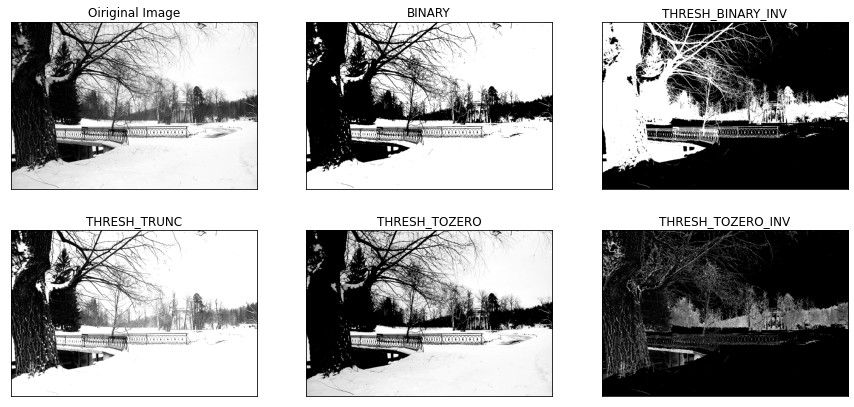

In [274]:
im_tree = cv.imread("/content/drive/MyDrive/image_assets/tree.jpg")
# Karena tipe image yang diterima adaptive thresshold harus gray maka kita ubah dulu ke gray dengan open cv
im_tree = cv.cvtColor(im_tree, cv.COLOR_BGR2RGB)
im_tree = cv.cvtColor(im_tree, cv.COLOR_RGB2GRAY)

ret,thresh_binary = cv.threshold(src=im_tree,thresh=127,maxval=255,type=cv.THRESH_BINARY)
ret,thresh_binary_inv = cv.threshold(im_tree,127,255,cv.THRESH_BINARY_INV)
ret,thresh_trunc = cv.threshold(im_tree,127,255,cv.THRESH_TRUNC)
ret,thresh_tozero = cv.threshold(im_tree,127,255,cv.THRESH_TOZERO)
ret,thresh_tozero_inv = cv.threshold(im_tree,127,255,cv.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = im_tree,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

fig = plt.figure(figsize=(15, 7))
r = 2
c = 3

for i in range(6):
    fig.add_subplot(r, c, i+1)
    plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Adaptive Thresshold**

Adaptive Thresshold adalah metode di mana nilai ambang batas dihitung untuk wilayah yang lebih kecil dan oleh karena itu, akan ada nilai ambang batas yang berbeda untuk wilayah yang berbeda.

Adaptive threshold bisa digunakan untuk mendeteksi tepi dari citra

Di OpenCV, Anda dapat melakukan operasi ambang batas Adaptif pada gambar menggunakan metode adaptifThreshold () dari kelas Imgproc.
Berikut metode adaptive thresshold pada open cv:
- ADAPTIVE_THRESH_MEAN_C : Nilai ambang adalah mean dari daerah lingkungan.
- ADAPTIVE_THRESH_GAUSSIAN_C : nilai ambang batas adalah jumlah terbobot dari nilai-nilai lingkungan di mana bobot adalah Gaussian window.

Sintaks
```
adaptiveThreshold(src, dst, maxValue, adaptiveMethod, thresholdType, blockSize, C)
```
- maxValue : nilai yang diberikan jika nilai melebihi ambang batas
- blockSize : ukuran pixel neighbour yang digunakan untuk menghitung nilai ambang batas
- C : konstanta yang digunakan dalam kedua metode (dikurangi dari mean atau mean tertimbang).

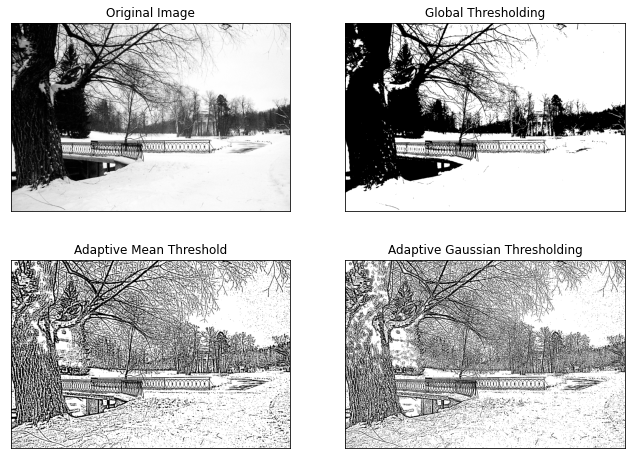

In [275]:
ret,thresh_global = cv.threshold(im_tree,127,255,cv.THRESH_BINARY)
thresh_mean = cv.adaptiveThreshold(src=im_tree,maxValue=255,adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv.THRESH_BINARY,blockSize=11,C=3)
thresh_gaussian = cv.adaptiveThreshold(im_tree,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,3)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [im_tree,thresh_global,thresh_mean,thresh_gaussian]

fig = plt.figure(figsize=(11, 8))
r = 2
c = 2

for i in range(4):
    fig.add_subplot(r, c, i+1)
    plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

## 2. Data Text

Pemprosesan data text biasa disebut Natural Language Processing (NLP).

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2021/01/Keras-Tokenizer-Example.png" width="400"/>

Tokenization adalah metode untuk memisahkan teks tertentu menjadi potongan-potongan kecil atau token. Di sini token atau potongan dapat berupa apa saja mulai dari kata hingga karakter, bahkan subkata.

Tokenisasi dibagi menjadi 3 jenis utama-
- Tokenisasi Kata
- Tokenisasi Karakter
- Tokenisasi subkata

Contoh : kata "Relaxing"
- Character Tokens : R-e-l-a-x-i-n-g
- Subword Tokens: Relax-ing




### Tokenizing menggunakan keras

Kelas Tokenizer Keras digunakan untuk membuat vektor korpus teks (sumber daya bahasa yang terdiri dari kumpulan teks yang besar dan terstruktur). Untuk ini, setiap input teks diubah menjadi urutan bilangan bulat atau vektor yang memiliki koefisien untuk setiap token dalam bentuk nilai biner.

Sintaks Tokenizer Keras
```
tf.keras.preprocessing.text.Tokenizer(
num_words=None,
filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
lower=True,
split=" ",
char_level=False,
oov_token=None,
document_count=0,
**kwargs)
```

Metode Tokenizer Keras
1. fit_on_texts
2. texts_to_sequences
3. texts_to_matrix
4. sequences_to_matrix



**1. fit_on_texts**

metode fit_on_texts adalah bagian dari Keras kelas tokenizer yang digunakan untuk memperbarui kosakata internal untuk daftar teks. Kita perlu memanggilnya sebelum menggunakan metode texts_to_sequences atau texts_to_matrix lainnya.

contoh 1 : fit_on_texts pada Document List

In [276]:
from keras.preprocessing.text import Tokenizer

t  = Tokenizer()
# Defining 4 document lists
fit_text = ['Machine Learning Knowledge',
            'Machine Learning',
            'Deep Learning',
            'Artificial Intelligence']

t.fit_on_texts(fit_text)

The document_count mencetak jumlah dokumen dalam korpus.  pada contoh diatas terdapat 4 dokumen

In [277]:
print("The document count : ",t.document_count)

The document count :  4


The WORD_COUNT menunjukkan berapa kali kata-kata yang ada di korpus diteruskan ke model kelas tokenizer Keras. Dalam contoh, kata 'Machine' muncul 2 kali, 'Learning' 3 kali, dan seterusnya.

In [278]:
print("The count of words",t.word_counts)

The count of words OrderedDict([('machine', 2), ('learning', 3), ('knowledge', 1), ('deep', 1), ('artificial', 1), ('intelligence', 1)])


word_doc mengembalikan jumlah dokumen munculnya masing-masing kata. Dalam contoh kita, 'machine' muncul dalam 2 dokumen, 'learning' dalam 1 dokumen, 'knowlage' dalam 3 dokumen, dan seterusnya.

In [279]:
print("The word docs",t.word_docs)

The word docs defaultdict(<class 'int'>, {'knowledge': 1, 'machine': 2, 'learning': 3, 'deep': 1, 'intelligence': 1, 'artificial': 1})


contoh 2 : fit_on_texts on String





In [280]:
t  = Tokenizer()

fit_text = 'Machine Learning'

t.fit_on_texts(fit_text)

print("Count of characters:",t.word_counts)
print("Length of text:",t.document_count)
print("Character index",t.word_index)
print("Frequency of characters:",t.word_docs)

Count of characters: OrderedDict([('m', 1), ('a', 2), ('c', 1), ('h', 1), ('i', 2), ('n', 3), ('e', 2), ('l', 1), ('r', 1), ('g', 1)])
Length of text: 16
Character index {'n': 1, 'a': 2, 'i': 3, 'e': 4, 'm': 5, 'c': 6, 'h': 7, 'l': 8, 'r': 9, 'g': 10}
Frequency of characters: defaultdict(<class 'int'>, {'m': 1, 'a': 2, 'c': 1, 'h': 1, 'i': 2, 'n': 3, 'e': 2, 'l': 1, 'r': 1, 'g': 1})


**2. texts_to_sequences**

metode texts_to_sequences membantu dalam mengubah token korpus teks menjadi urutan bilangan bulat.

contoh 1 : texts_to_sequences pada Daftar Dokumen

dapat dilihat misalnya machine diberi nilai 2

In [281]:
t = Tokenizer()

test_text = ['Machine Learning Knowledge',
	      'Machine Learning',
             'Deep Learning',
             'Artificial Intelligence']

t.fit_on_texts(test_text)

sequences = t.texts_to_sequences(test_text)

print("The sequences generated from text are : ",t.word_index)

The sequences generated from text are :  {'learning': 1, 'machine': 2, 'knowledge': 3, 'deep': 4, 'artificial': 5, 'intelligence': 6}


contoh 2 : texts_to_sequences on String

misal huruf 'e' diberi value 4

In [282]:
t = Tokenizer()

test_text = "Machine Learning"

t.fit_on_texts(test_text)

sequences = t.texts_to_sequences(test_text)

print("The sequences generated from text are : ",t.word_index)

The sequences generated from text are :  {'n': 1, 'a': 2, 'i': 3, 'e': 4, 'm': 5, 'c': 6, 'h': 7, 'l': 8, 'r': 9, 'g': 10}


**3. texts_to_matrix**

Metode lain yang berguna dari kelas tokenizer adalah fungsi texts_to_matrix() untuk mengubah dokumen menjadi bentuk matriks numpy.

Fungsi ini bekerja dalam 4 mode berbeda –

- binary : Nilai default yang memberitahu kita tentang keberadaan setiap kata dalam dokumen.
- count : Seperti namanya, hitungan untuk setiap kata dalam dokumen diketahui.
- tfidf : Skor TF-IDF untuk setiap kata dalam dokumen.
- freq : Frekuensi memberitahu kita tentang rasio kata dalam setiap dokumen.

Contoh 1: texts_to_matrix dengan mode = biner

Mode biner dalam  fungsi texts_to_matrix() menentukan keberadaan teks dengan menggunakan '1' dalam matriks di mana kata itu ada dan '0' di mana kata itu tidak ada. Mode ini tidak menghitung berapa kali suatu kata atau teks tertentu, tetapi hanya memberitahu tentang keberadaan kata di setiap dokumen.

In [283]:
# define 5 documents
docs = ['Marvellous Machine Learning Marvellous Machine Learning',
		'Amazing Artificial Intelligence',
		'Dazzling Deep Learning',
		'Champion Computer Vision',
		'Notorious Natural Language Processing Notorious Natural Language Processing']
# create the tokenizer
t = Tokenizer()

t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='binary')
print(encoded_docs)

[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Contoh 2: texts_to_matrix dengan mode = count

Mode hitungan dalam fungsi texts_to_matrix() menentukan berapa kali kata-kata muncul di setiap dokumen.

In [284]:
# define 5 documents 
docs = ['Marvellous Machine Learning Marvellous Machine Learning', 
'Amazing Artificial Intelligence', 
'Dazzling Deep Learning', 
'Champion Computer Vision', 
'Notorious Natural Language Processing Notorious Natural Language Processing'] 

# create the tokenizer
t = Tokenizer()

t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='count')

print(encoded_docs)

[[0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0.]]


Contoh 3: texts_to_matrix dengan mode = tfidf

TF-IDF atau Term Frequency – Inverse Document Frequency , bekerja dengan memeriksa relevansi sebuah kata dalam korpus teks yang diberikan.

Dalam mode ini,  skor proporsional diberikan pada kata-kata berdasarkan frekuensi kemunculannya dalam korpus teks. Dengan cara ini, model ini dapat menentukan kata mana yang layak dan mana yang tidak.

In [285]:
t.fit_on_texts(docs)
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs)

[[0.         1.8601123  2.48272447 2.48272447 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.46633707 1.46633707 1.46633707 0.
  0.         0.         0.         0.        ]
 [0.         1.09861229 0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.46633707
  1.46633707 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.46633707 1.46633707 1.46633707]
 [0.         0.         0.         0.         2.48272447 2.48272447
  2.48272447 2.48272447 0.         0.         0.         0.
  0.         0.         0.         0.        ]]


Contoh 4: texts_to_matrix dengan mode = freq

Mode terakhir yang digunakan dalam texts_to_matrix() adalah frekuensi yang benar-benar menentukan skor dan menetapkan masing-masing berdasarkan rasio kata dengan semua kata dalam dokumen atau korpus teks.

In [286]:
t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='freq')

print(encoded_docs)

[[0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.         0.25       0.25
  0.25       0.25       0.         0.         0.         0.
  0.         0.         0.         0.        ]]


**4. Sequence to Matrix**

Fungsi sequences_to_matrix() dari kelas tokenizer Keras digunakan untuk mengubah urutan menjadi bentuk matriks numpy.

**Pads Sequence dengan panjang yang sama**

pad_sequences digunakan untuk memastikan bahwa semua urutan dalam list memiliki panjang yang sama. Secara default hal ini dilakukan dengan padding 0 di awal setiap urutan sampai setiap urutan memiliki panjang yang sama dengan urutan terpanjang.

contoh
```
>>> pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]])
array([[0, 1, 2, 3],
       [3, 4, 5, 6],
       [0, 0, 7, 8]], dtype=int32)
```
[3, 4, 5, 6] adalah urutan terpanjang, jadi 0akan diisi ke urutan lain sehingga panjangnya cocok [3, 4, 5, 6].

Untuk membuat urutan pad ke akhir urutan dilakukan dengan mengatur padding='post'.

untuk menentukan panjang maksimum setiap urutan, dapat menggunakan maxlen argumen. Ini akan memotong semua urutan lebih panjang dari maxlen.

In [287]:
t  = Tokenizer()
# Defining 4 document lists
text = ['Machine Learning Knowledge',
            'Machine Learning',
            'Deep Learning',
            'Artificial Intelligence']

t.fit_on_texts(text)
seq = t.texts_to_sequences(text)

from tensorflow.keras.preprocessing.sequence import pad_sequences
ps = pad_sequences(seq)
print(ps)

[[2 1 3]
 [0 2 1]
 [0 4 1]
 [0 5 6]]


In [288]:
# Membuat padding ke akhir dan panjang maksimal 5 
ps = pad_sequences(seq, padding='post',maxlen=5)
print(ps)

[[2 1 3 0 0]
 [2 1 0 0 0]
 [4 1 0 0 0]
 [5 6 0 0 0]]


In [289]:
# hapus nilai dari urutan yang lebih besar dari maxlen, baik di awal atau di akhir urutan.
# default truncating="pre"
ps = pad_sequences(seq, maxlen=2, truncating='post')
print(ps)

[[2 1]
 [2 1]
 [4 1]
 [5 6]]


### Tokenizing menggunakan NLTK


In [290]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Berikut Word Tokenizing menggunakan NLTK

In [291]:
T = '''Good muffins cost $3.88\nin New York.
      Please buy me two of them.\n\nThanks.'''
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens)

['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


Bandingkan jika menggunakan fungsi split di python

In [292]:
print(T.split())

['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks.']


NLTK juga menyediakan tokenizer berbasis ekspresi reguler yang lebih sederhana, yang membagi teks pada spasi dan tanda baca:

In [293]:
print(nltk.wordpunct_tokenize(T))

['Good', 'muffins', 'cost', '$', '3', '.', '88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


Tokenizing kalimat menggunakan

In [294]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens)

['Good muffins cost $3.88\nin New York.', 'Please buy me two of them.', 'Thanks.']


Tokenizing kata dari kalimat

In [295]:
print([nltk.word_tokenize(s) for s in nltk.sent_tokenize(T)])

[['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.'], ['Please', 'buy', 'me', 'two', 'of', 'them', '.'], ['Thanks', '.']]


### Tokenizing menggunakan Spacy

Di Spacy, proses tokenizing teks menjadi segmen kata dan tanda baca dilakukan dalam berbagai langkah. Spacy memproses teks dari kiri ke kanan.
- Pertama, tokenizer membagi teks pada spasi yang mirip dengan fungsi split().
- Kemudian tokenizer memeriksa apakah substring cocok dengan aturan pengecualian tokenizer. Misalnya, "don't" tidak mengandung spasi, tetapi harus dibagi menjadi dua token, "do" dan "not", sedangkan "U.K" harus selalu tetap satu token.
- Selanjutnya, ia memeriksa awalan, akhiran, atau sisipan dalam substring, ini termasuk koma, titik, tanda hubung, atau tanda kutip. Jika cocok, substring dibagi menjadi dua token.


In [296]:
!pip install spacy

Tokenizing dengan spacy telah menyediakan model khusus bahasa indonesia

In [297]:
# Konstruksi 1 : default tokenizer bahasa indonesia

from spacy.lang.id import Indonesian
# Model bahasa yang digunakan
nlp_id = Indonesian()  
tokenizer = nlp_id.tokenizer

teks = "Pagi itu, Anton pergi ke kampus bersama teman. Sedangkan Hj.Umar makan dikantin sambil memandang orang-orang yang lewat"
tokenS_id = nlp_id(teks)

print("Default Tokenizer : ",[t for t in tokenS_id])

Default Tokenizer :  [Pagi, itu, ,, Anton, pergi, ke, kampus, bersama, teman, ., Sedangkan, Hj, ., Umar, makan, dikantin, sambil, memandang, orang-orang, yang, lewat]


Kita ingin menjadikan Hj.Umar sebagai satu bagian maka kita tambahkan vocab ke tokenizernya

In [298]:
# Konstruksi 2 : menggunakan nlp.vocab

from spacy.tokenizer import Tokenizer
nlp_id = Indonesian()  
tokenizer = Tokenizer(nlp_id.vocab)

tokenS_id = tokenizer(teks)
print("Blank Tokenizer : ",[t for t in tokenS_id])

Blank Tokenizer :  [Pagi, itu,, Anton, pergi, ke, kampus, bersama, teman., Sedangkan, Hj.Umar, makan, dikantin, sambil, memandang, orang-orang, yang, lewat]


Coba membandingkan jika modelnya menggunakan bahasa inggris, maka dapat dilihat bahwa modelnya benar-benar tidak mengenali tanda baca seperti kata hubung dalam bahasa indonesia dalam kata orang-orang

In [299]:
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Pagi', 'itu', ',', 'Anton', 'pergi', 'ke', 'kampus', 'bersama', 'teman', '.', 'Sedangkan', 'Hj', '.', 'Umar', 'makan', 'dikantin', 'sambil', 'memandang', 'orang', '-', 'orang', 'yang', 'lewat']


## 3. Data Audio


Sinyal audio adalah sinyal yang bergetar dalam rentang frekuensi yang dapat didengar.

**librosa** adalah paket python untuk analisis musik dan audio. Ini menyediakan blok bangunan yang diperlukan untuk membuat sistem pencarian informasi musik. Librosa membantu memvisualisasikan sinyal audio dan juga melakukan ekstraksi fitur di dalamnya menggunakan teknik pemrosesan sinyal yang berbeda.

Dengan librosa file audio dimuat sebagai deret waktu floating point.
Audio akan secara otomatis disampel ulang ke tingkat yang diberikan (default sr=22050).

In [300]:
import librosa
audio_data = '/content/drive/MyDrive/Dataset/lofi_hip_hop.wav'
data , sample_rate = librosa.load(audio_data)
print(type(data), type(sample_rate))

<class 'numpy.ndarray'> <class 'int'>


Menampilkan informasi dasar dari audio

In [301]:
print('Total number of samples: ',data.shape[0])
print('Sample rate: ',sample_rate)
print('Lenngth of file in seconds: ',librosa.get_duration(data))

Total number of samples:  249036
Sample rate:  22050
Lenngth of file in seconds:  11.294149659863946


untuk menampilkan dan memutar file audio di notebook dapat menggunakan IPython.display

In [302]:
import IPython.display as ipd
ipd.Audio(audio_data)

Sinyal hanyalah urutan variasi dalam kuantitas tertentu sehubungan dengan waktu (untuk sinyal audio yang kuantitasnya adalah tekanan udara). Sekarang kita akan mencoba menangkap pemahaman ini secara digital.

Visualisasi Data Audio dengan Waveplot, digunakan untuk memplot bentuk gelombang alami dari audio tiap waktunya,



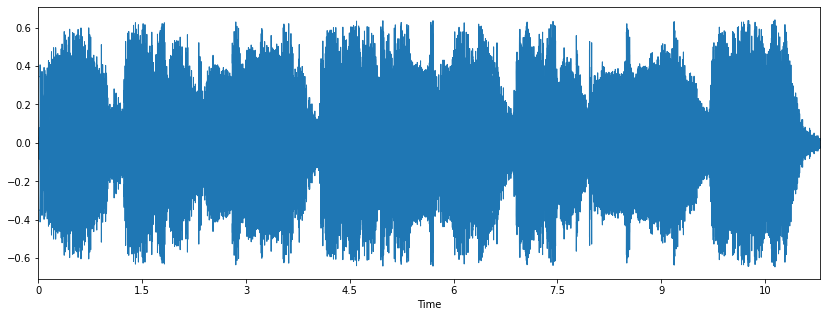

In [314]:
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sample_rate)

Spektogram adalah representasi visual dari spektrum frekuensi yang berbeda untuk tiap waktu. 

Dengan librosa jenis frekuensi yang digunakan untuk spektogram terbagi menjadi:
- 'linier', 'fft', 'hz' : rentang frekuensi ditentukan oleh jendela FFT dan laju pengambilan sampel.
- 'log' : spektrum ditampilkan pada skala log.
- 'fft_note': spektrum ditampilkan pada skala log dengan nada yang ditandai.
- 'fft_svara': spektrum ditampilkan pada skala log dengan svara ditandai.
- 'mel' : frekuensi ditentukan oleh skala mel.
- 'cqt_hz' : frekuensi ditentukan oleh skala CQT.
- 'cqt_note' : titinada ditentukan oleh skala CQT.
- 'cqt_svara' : seperti cqt_note tetapi menggunakan svara Hindustan atau Carnatic.

Berikut contoh spektogram dengan jenis frekuensi 'linear' dan 'log'

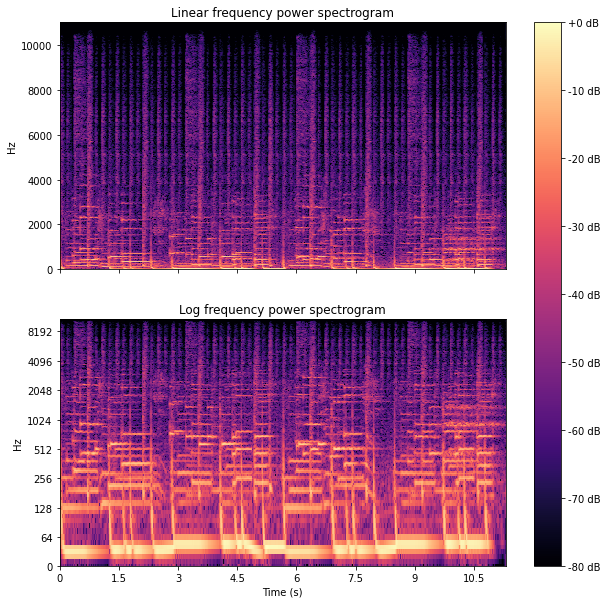

In [304]:
d = librosa.stft(data)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)

fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))

img = librosa.display.specshow(D, y_axis='linear', x_axis='s',sr=sample_rate,ax=ax[0])

ax[0].set(title='Linear frequency power spectrogram')
ax[0].label_outer()
librosa.display.specshow(D,y_axis='log',x_axis='s',sr=sample_rate,ax=ax[1])

ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')

Dari dua spektogram di atas, dapat dikatakan bahwa file tersebut berisi informasi paling banyak pada frekuensi yang lebih rendah; kedua grafik mengandung informasi yang sama. Oleh karena itu, untuk melakukan analisis lebih lanjut, sebaiknya menggunakan plot frekuensi log. 

**Membuat signal audio**

In [305]:
import numpy as np
# sample rate (laju sample)
sr = 22050 
# detik
T = 6.0    
# time variable
t = np.linspace(0, T, int(T*sr), endpoint=False) 
# Gelombang sinus murni pada 220 Hz
x = 0.5*np.sin(2*np.pi*220*t)
#Memutar audio
ipd.Audio(x, rate=sr)

untuk menyimpan audio salah satu caranya dapat menggunakan soundfiles

In [306]:
import soundfile as sf
#Saving the audio
sf.write('tone_220.wav', x, sr)

#### Ekstraksi fitur dari sinyal Audio

Setiap sinyal audio terdiri dari banyak fitur. Namun, kita harus mengekstrak karakteristik yang relevan dengan masalah yang kita coba pecahkan.

fitur spektral (frekuensi berbasis fitur), yang diperoleh dengan mengkonversi sinyal berbasis waktu menjadi domain frekuensi menggunakan Fourier Transform, seperti frekuensi dasar, komponen frekuensi, spektral massa, spektral fluks, spektral density, spektral roll-off, dll.

1.Spectral Centroid (SC) mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.

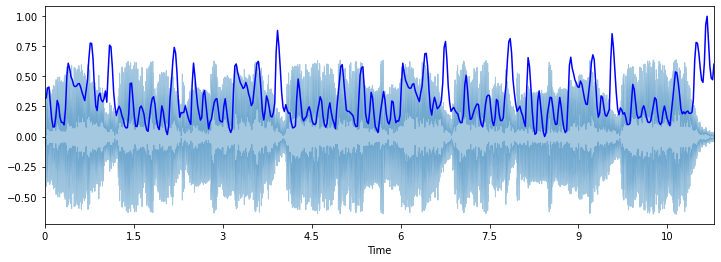

In [307]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
spectral_centroids.shape
(775,)

# Menghitung variabel waktu untuk visualisasi
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Menormalkan pusat spektral untuk visualisasi
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting Spectral Centroid disepanjang bentuk gelombang
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

2.Spectral Rolloff (SR) Yaitu menentukan nilai frekuensi yang terletak dibawah nilai distribusi spektrum (biasanya bernilai 90%) terkonsentrasi. C, parameter persentase.

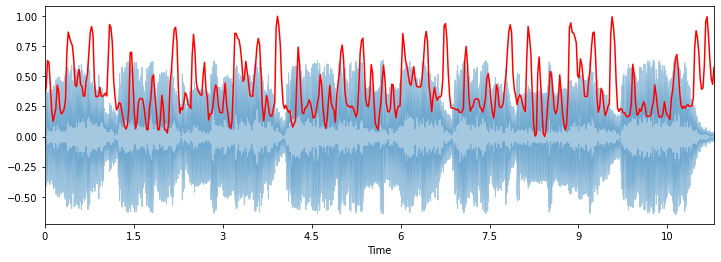

In [308]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

3.Spectral bandwidth didefinisikan sebagai lebar pita cahaya pada setengah puncak maksimum (atau lebar penuh pada setengah maksimum [FWHM]) dan diwakili oleh dua garis merah vertikal dan SB pada sumbu panjang gelombang.


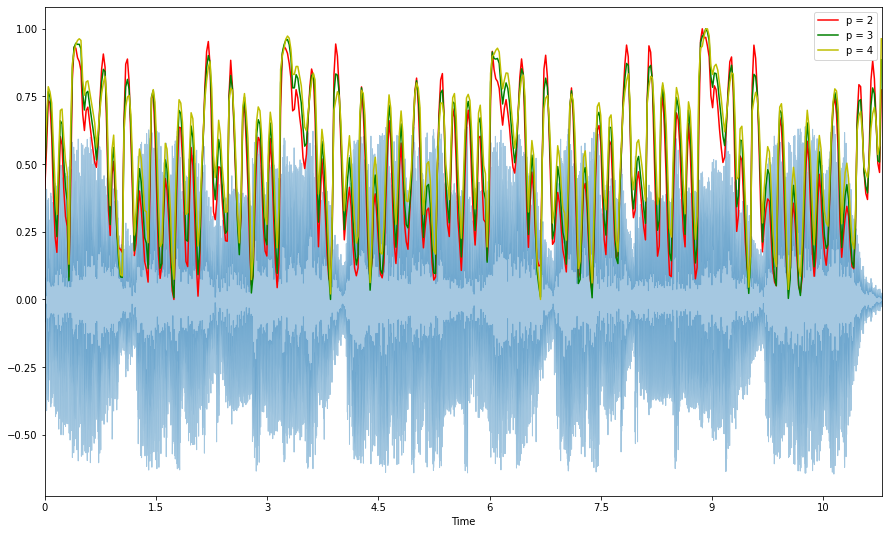

In [309]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

4.Zero crossing rate, Cara yang sangat sederhana untuk mengukur kelancaran sinyal adalah dengan menghitung jumlah zero-crossing dalam segmen sinyal tersebut. Sinyal suara berosilasi perlahan — misalnya, sinyal 100 Hz akan melewati nol 100 per detik — sedangkan frikatif tak bersuara dapat memiliki 3000 nol penyeberangan per detik. Biasanya memiliki nilai yang lebih tinggi untuk suara yang sangat perkusi seperti yang ada di metal dan rock.  

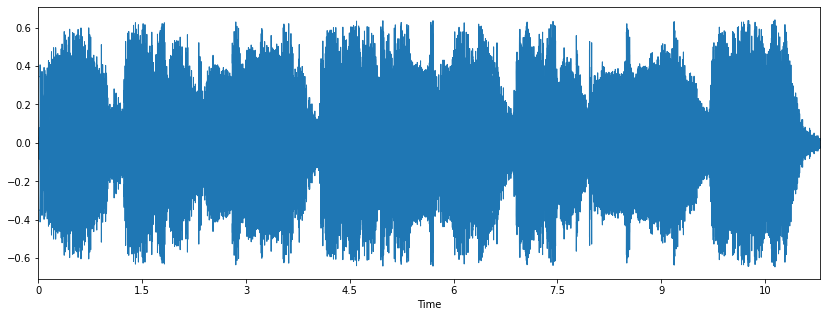

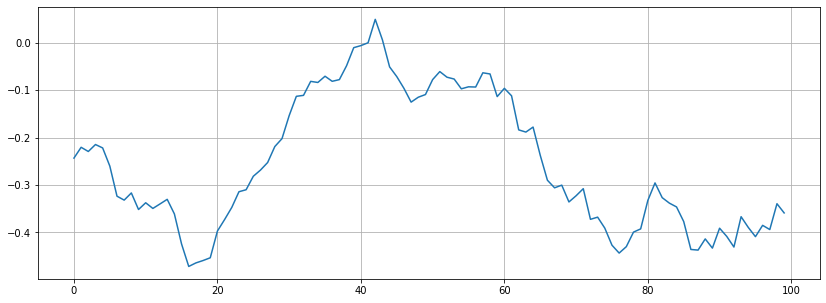

In [310]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sample_rate)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

Tampaknya ada 2 penyeberangan nol. Mari kita verifikasi dengan Librosa.

In [311]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

2


5.Mel-Frequency Cepstrum Coefficients (MFCC) adalah salah satu bentuk representasi cepstral dari sinyal dimana frekuensi didistribusi berdasarkan skala mel bukan secara pendekatan linear.

(20, 487)


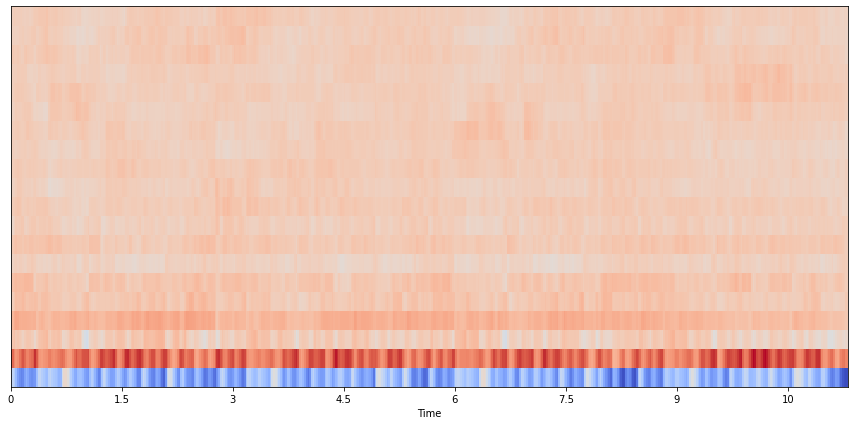

In [312]:
mfccs = librosa.feature.mfcc(data, sr=sample_rate)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

Chroma feature, Sebuah fitur chroma atau vektor biasanya vektor fitur 12-unsur yang menunjukkan berapa banyak energi dari masing-masing kelas lapangan, {C, C #, D, D #, E, ..., B}, hadir dalam sinyal. 

[Text(0.5, 1.0, 'Chromagram')]

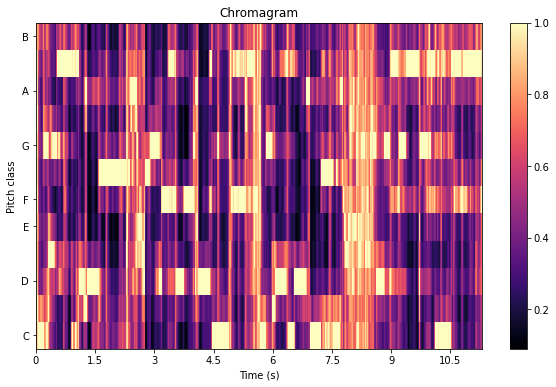

In [313]:
C = np.abs(librosa.stft(data))
chroma = librosa.feature.chroma_stft(S=C, sr=sample_rate)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='s', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')